In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [54]:
diabetes_X = diabetes_X[:, np.newaxis, 2]
len(diabetes_X)

442

In [6]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [7]:
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [8]:
regr = linear_model.LinearRegression()

In [9]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [10]:
diabetes_y_pred = regr.predict(diabetes_X_test)

In [13]:
#Coeficiente de regresion, en este caso solo hay una variable, es el coeficiente de X1
regr.coef_[0]

938.2378612512637

In [15]:
#Error cuadratrico medio MSE
#La suma de las diferencia entre la prediccion y los valores reales, al cuadrado
mean_squared_error(diabetes_y_test, diabetes_y_pred)

2548.0723987259694

In [14]:
#Valor r2, coeficiente de determinacion
#Mientras mas alejado este de 1, menos ajustado esta el modelo
r2_score(diabetes_y_test, diabetes_y_pred)

0.47257544798227147

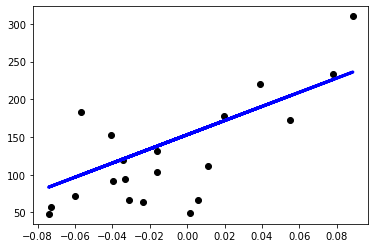

In [19]:
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [135]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [136]:
np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]

In [137]:
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [139]:
def plot(x_lim = [0, 1], y_lim = [-2, 2]):
    plt.figure(figsize=(14, 10))
    for i in range(len(degrees)):
        ax = plt.subplot(1, len(degrees), i + 1)
        plt.setp(ax, xticks=(), yticks=())

        polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline(
            [
                ("polynomial_features", polynomial_features),
                ("linear_regression", linear_regression),
            ]
        )
        pipeline.fit(X[:, np.newaxis], y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(
            pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
        )

        X_test = np.linspace(0, 10, 100)
        plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
        plt.plot(X_test, true_fun(X_test), label="True function")
        plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((x_lim[0], x_lim[1]))
        plt.ylim((y_lim[0], y_lim[1]))
        plt.legend(loc="best")
        plt.title(
            "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
                degrees[i], -scores.mean(), scores.std()
            )
        )
    plt.show()

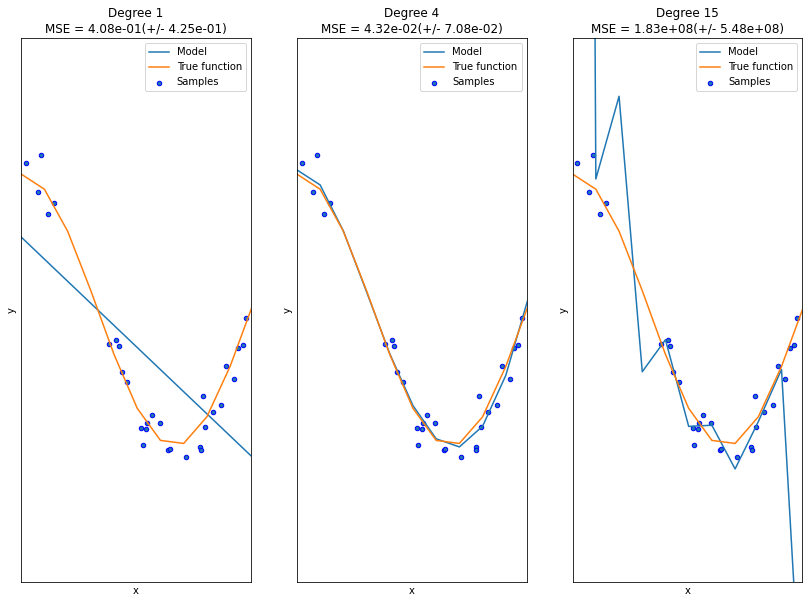

In [140]:
plot()

In [141]:
n_samples = 50
def true_fun(X):
    return np.sin(X)
X = np.sort(5 * np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

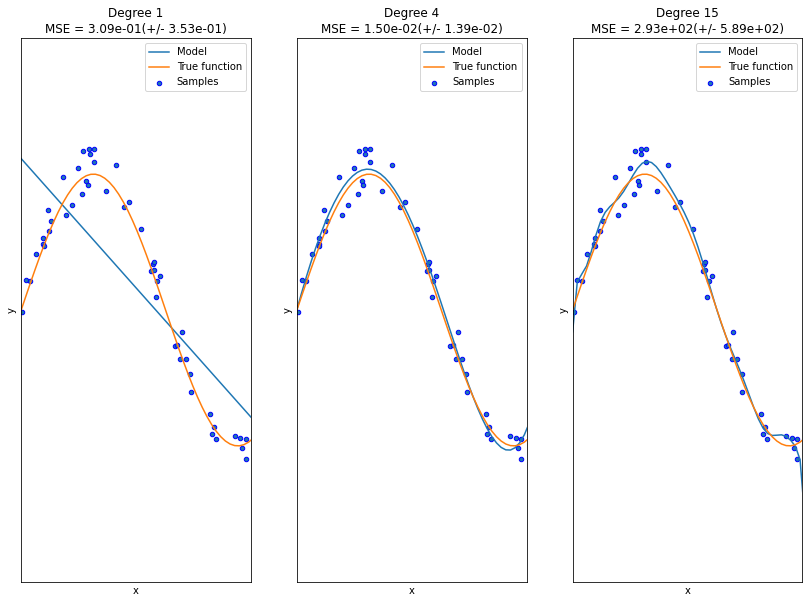

In [142]:
plot(x_lim = [0,5])

In [111]:
from sklearn.svm import SVR

In [149]:
#Cuando se hace mas grande, podemos caer en overfitting y si se hace mas pequeña puede haber overfitting
#Con gamma, aplica el mismo principio
#Epsilon nos permite saber que tanto aceptaremos los valores al validar 
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [146]:
svrs = [svr_lin, svr_rbf,  svr_poly]
kernel_label = ["Linear","RBF",  "Polynomial"]

In [147]:
def plot_svr(x_lim = [0, 1], y_lim = [-2, 2]):
    plt.figure(figsize=(14, 10))
    for i in range(len(svrs)):
        ax = plt.subplot(1, len(svrs), i + 1)
        plt.setp(ax, xticks=(), yticks=())

        svr = svrs[i]
        svr.fit(X[:, np.newaxis], y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(
            svr, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
        )

        X_test = np.linspace(0, 10, 100)
        plt.plot(X_test, svr.predict(X_test[:, np.newaxis]), label="Model")
        plt.plot(X_test, true_fun(X_test), label="True function")
        plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((x_lim[0], x_lim[1]))
        plt.ylim((y_lim[0], y_lim[1]))
        plt.legend(loc="best")
        plt.title(
            "Kernel {}\nMSE = {:.2e}(+/- {:.2e})".format(
                kernel_label[i], -scores.mean(), scores.std()
            )
        )
    plt.show()

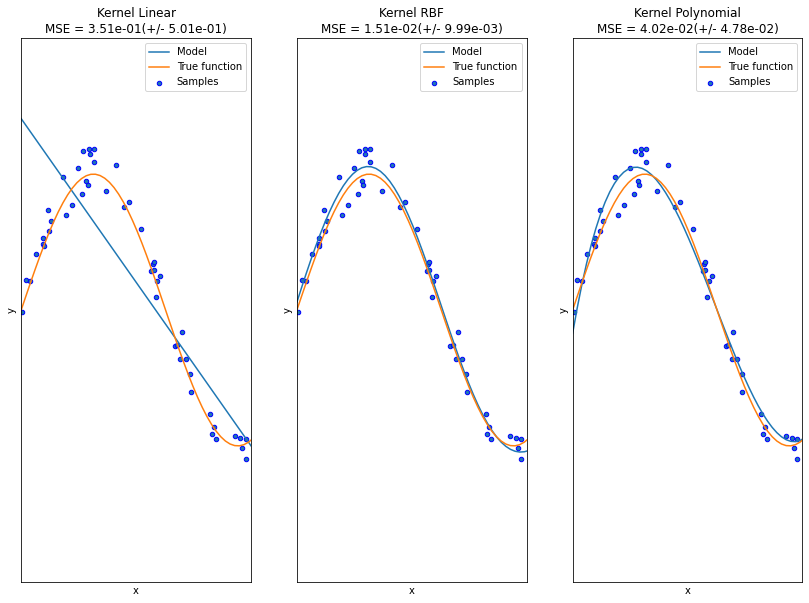

In [148]:
plot_svr(x_lim=[0,5])

In [ ]:
#Revisar documentacion
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
#Actividad 5
#Cree los graficos de comparacion para regresion lineal polinomial y para los modelos SVR 
#Hagalo usando una funcion trigonometrica de su eleccion